In [59]:
%matplotlib inline

import sys
sys.path.append('../src/')

import glob
import warnings

import numpy as np
import pandas as pd
import xarray as xr

from scipy.optimize import curve_fit, minimize

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from cmocean import cm
import hvplot.xarray

from sklearn.linear_model import LinearRegression

from epsilon_tools import *
from tools import str2date, avg_funs

import warnings
warnings.simplefilter("ignore",category=FutureWarning)
warnings.simplefilter("ignore",category=RuntimeWarning)

# set up figure params
sns.set(style='ticks', context='poster', palette='colorblind')
mpl.rc('figure', dpi=100, figsize=[12, 6])
mpl.rc('savefig', dpi=500, bbox='tight')
mpl.rc('legend', frameon=False)

## Compute Monin-Obhukov scale (from heat fluxes and winds only)

Monin Obukho scale is defined as $$L \equiv \frac{-u^{*3}}{\kappa B_0}$$\
with friction velocity $u^{*} = \sqrt{\frac{\tau}{\rho}}$,\
net buoyancy flux at the surface $B_0$,\
and van Karman constant $\kappa = 0.4$.

Since reanalysis heat flux $Q_{net}$ is in [W/m2], it needs to be converted to buoyancy flux in [W/kg] by $B_0 = -g \alpha_T Q_{net}/c_p$.

In [190]:
dat = xr.open_dataset('../data/ml/ww_7781a_1h_2Tf.nc')
met = xr.open_dataset('../data/xarray/qc_ww_7781a.nc')
dat = dat.sel( time = slice('10-10-2016','11-10-2016') )
met = met.sel( mettime = slice('10-10-2016','11-10-2016') )

In [191]:
flot = xr.open_dataset('../data/xarray/qc_7781a.nc')

In [192]:
flot

<xarray.Dataset>
Dimensions:   (time: 616, z: 501)
Coordinates:
  * time      (time) datetime64[ns] 2016-08-24T23:49:08.081619 ... 2016-11-03T17:48:31.978475
  * z         (z) float64 -0.0 -1.985 -3.969 -5.954 ... -986.0 -988.0 -989.9
    pressure  (z) float64 ...
    lat       (time) float64 ...
    lon       (time) float64 ...
Data variables:
    sigma     (z, time) float64 ...
    T         (z, time) float64 ...
    S         (z, time) float64 ...
    n2        (z, time) float64 ...
    rho0      (z, time) float64 ...
    u         (z, time) float64 ...
    v         (z, time) float64 ...
    dudz      (z, time) float64 ...
    dvdz      (z, time) float64 ...
    kT        (z, time) float64 ...
    chi       (z, time) float64 ...
    eps       (z, time) float64 ...
Attributes:
    floatid:  7781a

In [193]:
import gsw
cp = gsw.cp_t_exact(flot.isel(z=0).S.mean(),flot.isel(z=0).T.mean(),0)
alphaT = gsw.alpha(flot.isel(z=0).S.mean(),flot.isel(z=0).T.mean(),0)

In [194]:
rho0=1025
met['tau'] = 0.5*np.sqrt( met.tx**2 + met.ty**2 )
met['uprime'] = np.sqrt( met.tau/rho0)
met['Qnet'] = met.Qnet*9.81*alphaT/cp
met['MO'] = -met.uprime**3/(0.4*met.Qnet)

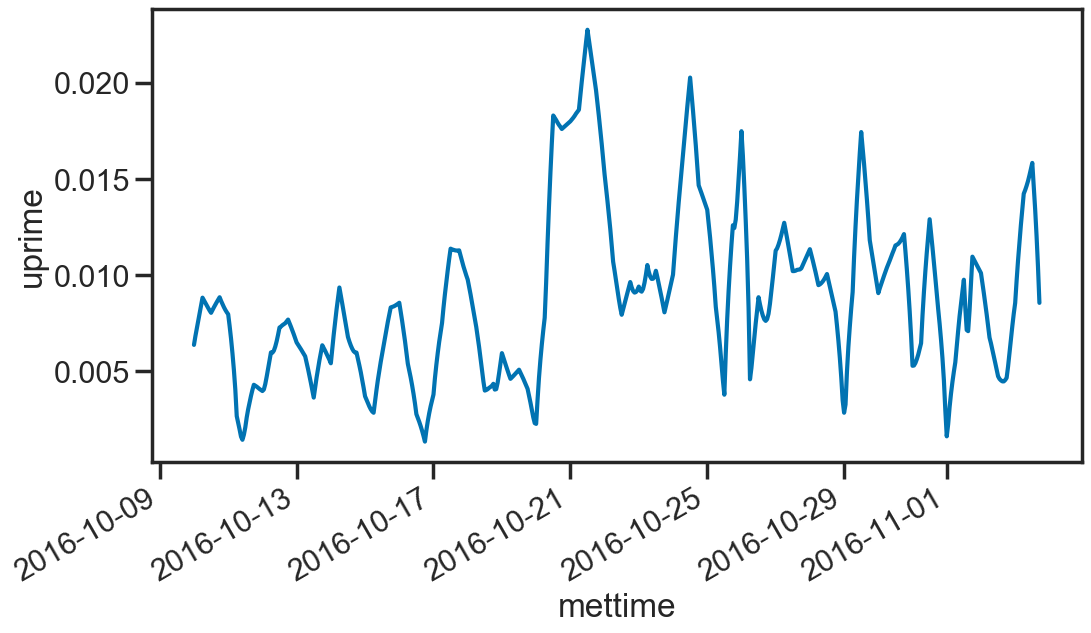

In [202]:
met['uprime'].plot()

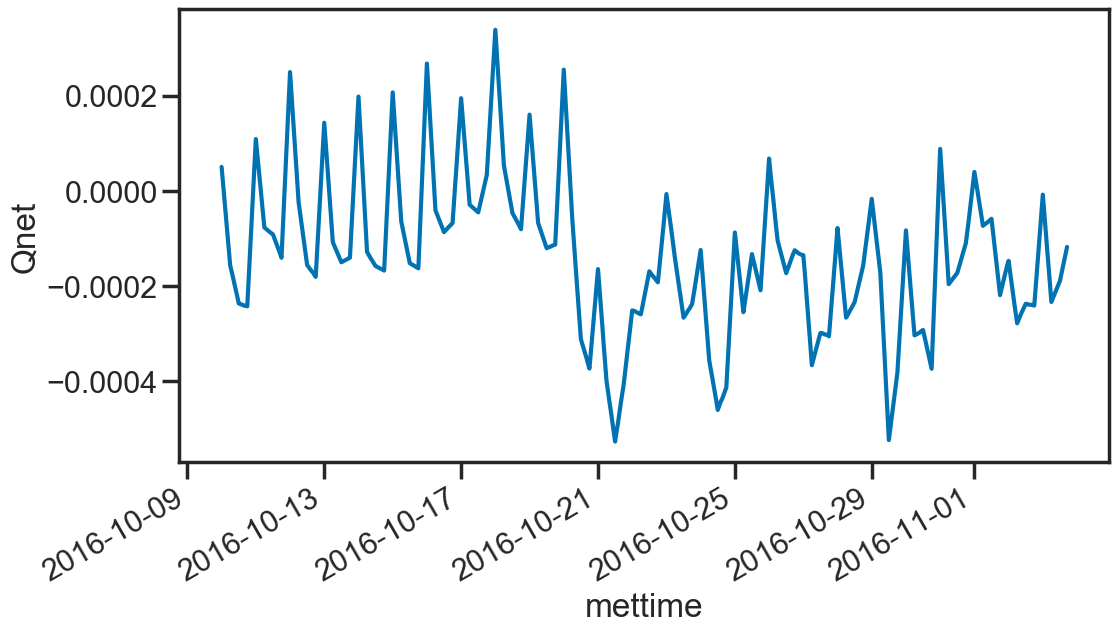

In [201]:
met['Qnet'].plot()

(-0.1, 0.1)

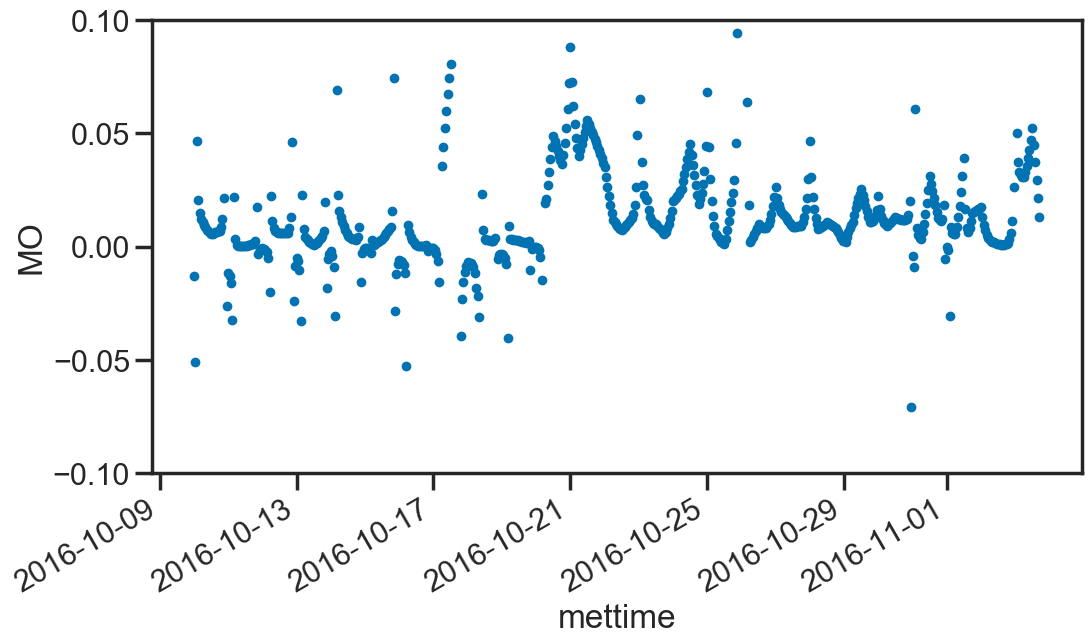

In [200]:
met.MO.plot(lw=0,marker='.')
plt.ylim(-0.1,0.1)

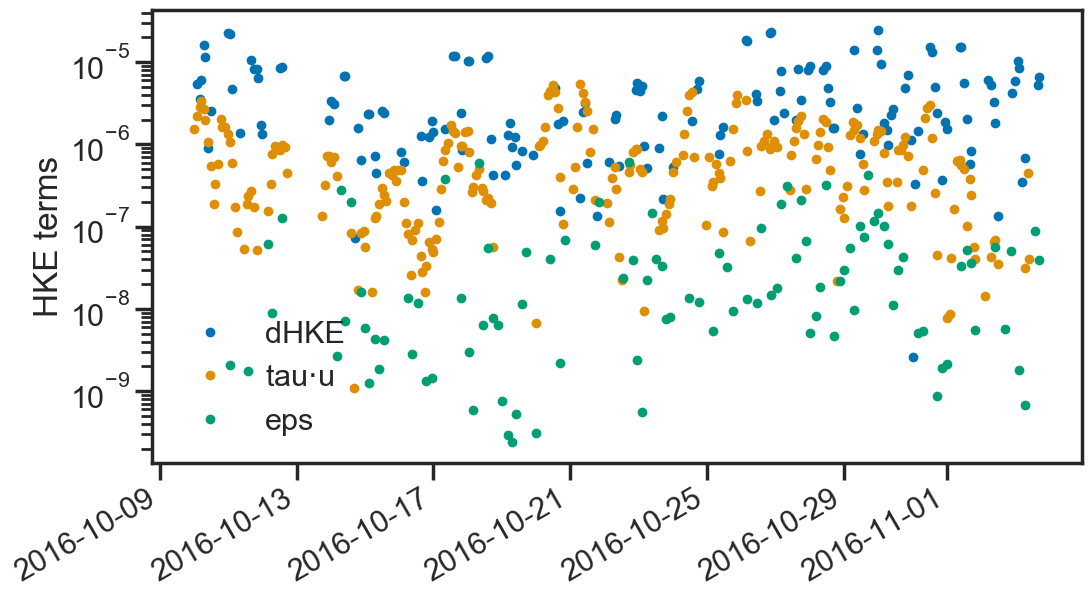

In [196]:
dat.dHKEdt_total.plot(marker='.',lw=0, label='dHKE')
dat.taudotu.plot(marker='.',lw=0, label=r'tau$\cdot$u')
dat.eps.pipe(np.abs).plot(marker='.',lw=0, label='eps')
plt.yscale('log')
plt.ylabel('HKE terms')
plt.xlabel(None)
plt.legend();

In [113]:
# My Stuff
from tools import datenum2datetime, load_matfile

In [115]:
path = '../data/metdata/float_cfs_hourly.mat'
data = load_matfile(str(path))

In [117]:
data.Qnet

AttributeError: 'dict' object has no attribute 'Qnet'